# Wine Quality Project 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


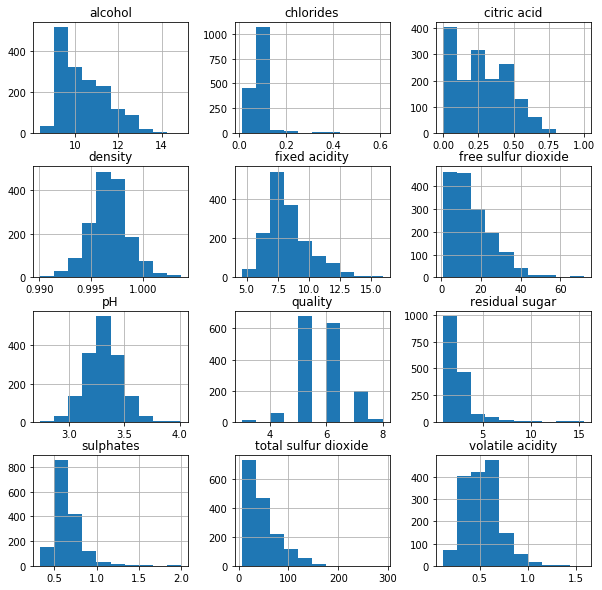

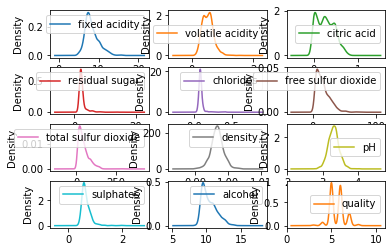

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.925,0.0905,0.035,0.997565,7.50,6.0,3.39,2.1,0.545,15.0,0.845
4,10.000,0.0800,0.090,0.996500,7.50,11.0,3.37,2.1,0.560,26.0,0.670
5,9.700,0.0810,0.230,0.997000,7.80,15.0,3.30,2.2,0.580,47.0,0.580
6,10.500,0.0780,0.260,0.996560,7.90,14.0,3.32,2.2,0.640,35.0,0.490
7,11.500,0.0730,0.400,0.995770,8.80,11.0,3.28,2.3,0.740,27.0,0.370
8,12.150,0.0705,0.420,0.994940,8.25,7.5,3.23,2.1,0.740,21.5,0.370


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


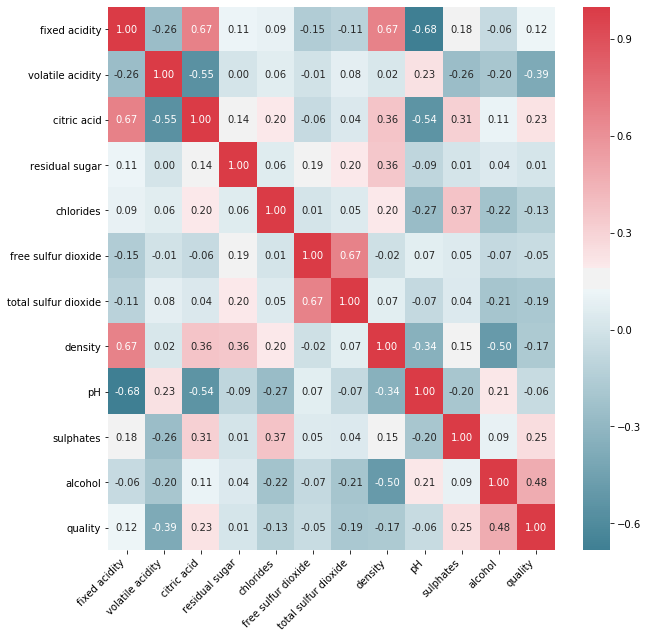

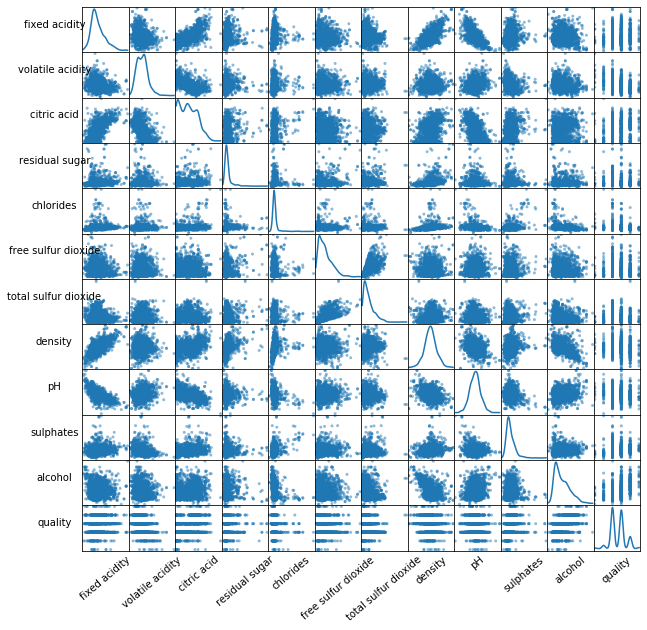

0    1382
1     217
Name: quality, dtype: int64


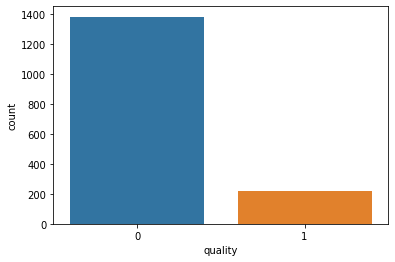

SupportVectorClassifier: 0.623107 (0.072580)
StochasticGradientDecentC: 0.530410 (0.064623)
RandomForestClassifier: 0.697232 (0.071608)
DecisionTreeClassifier: 0.630551 (0.069642)
GaussianNB: 0.551314 (0.067737)
KNeighborsClassifier: 0.572994 (0.047384)
AdaBoostClassifier: 0.553008 (0.055575)


/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

LogisticRegression: 0.606427 (0.072751)


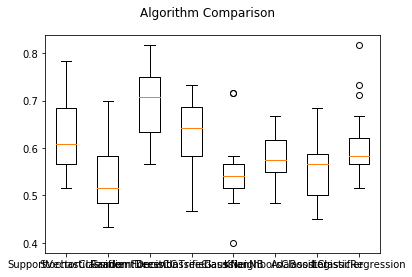

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
import hashlib
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection

wine_path =  "/cxldata/datasets/project/"

def wine_data(WINE_PATH=wine_path):
    csv_path=os.path.join(wine_path,'wine_quality_red.csv')
    return pd.read_csv(csv_path)

#duplicate data for safety.
winefulldata_orig= wine_data()
winefulldata_copy= winefulldata_orig.copy()

#data secured as a dupliate.
#winefulldata_copy.info()
#display(winefulldata_copy.head())
#winefulldata_copy.hist(figsize=(12,12))
#plt.show()

#Data ready to be split into Train and test data
#Function to split training set and test set.
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]



def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 *test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

#wine_with_id = winefulldata_copy.reset_index()
#train_set, test_set = split_train_test_by_id(wine_with_id, 0.2, "index")

#splitting Train and test data by sklearn
from sklearn.model_selection import train_test_split
X=winefulldata_copy.drop('quality', axis=1)
Y=winefulldata_copy['quality']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_test.head()

# now the trainset and test set are split

# Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#pd.DataFrame(opt_test_set)

# Statistical analysis of each feature/ Describing master dataset
display(winefulldata_copy.describe())

# Histograms
winefulldata_copy.hist(bins=10,figsize=(10, 10))
plt.show()

# Density
winefulldata_copy.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

#drawing Pivot Table (It shows aggregate comparision with each value of quality)

colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df_pivot_table = winefulldata_copy.pivot_table(colum_names,
               ['quality'], aggfunc='median')
display(df_pivot_table)

#applying correlation (gives which column has more impact on quality and ranges from -1 to 1 (-1 stands for inversely proportional and 1 is directly proportional))
corr_matrix = winefulldata_copy.corr()
print(corr_matrix["quality"].sort_values(ascending=False))


# Generate Heat Map, allow annotations and place floats in map
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']

sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(colum_names, rotation=45, horizontalalignment='right');
ax.set_yticklabels(colum_names);
plt.show()

#Scatter plot matrix (You could visualize the scatterplot matrix for the better understanding relationship between a pair of variables. It plots every numerical attribute against every other.)
#below function is defined by me using a predifined funtion to avoid repeated calling the graph
def plot_scatter_matrix():
    # Scatterplot Matrix
    sm = pd.plotting.scatter_matrix(winefulldata_copy, figsize=(10, 10), diagonal='kde')
    #Change label rotation
    [s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
    [s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
    #May need to offset label when rotating to prevent overlap of figure
    [s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
    #Hide all ticks
    [s.set_xticks(()) for s in sm.reshape(-1)]
    [s.set_yticks(()) for s in sm.reshape(-1)]
    plt.show()
    
plot_scatter_matrix()

## All set for Data Cleaning

#In our dataset there aren’t any missing values, outliers, attributes that provide no useful information for the task. So, we could conclude that our data set is quite clean

# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6, 8)
group_names = ['bad', 'good']
winefulldata_copy['quality'] = pd.cut(winefulldata_copy['quality'], bins = bins, labels = group_names)
# Now lets assign a labels to our quality variable
label_quality = preprocessing.LabelEncoder()
# Bad becomes 0 and good becomes 1
winefulldata_copy['quality'] = label_quality.fit_transform(winefulldata_copy['quality'])
print(winefulldata_copy['quality'].value_counts())
sns.countplot(winefulldata_copy['quality'])
plt.show()


from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Calculate the result for each algorithm
def result_each_algorithm():
    # prepare configuration for cross validation test harness
    seed = 7
    # prepare models
    models = []
    models.append(('SupportVectorClassifier', SVC()))
    models.append(('StochasticGradientDecentC', SGDClassifier()))
    models.append(('RandomForestClassifier', RandomForestClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    models.append(('GaussianNB', GaussianNB()))
    models.append(('KNeighborsClassifier', KNeighborsClassifier()))
    models.append(('AdaBoostClassifier', AdaBoostClassifier()))
    models.append(('LogisticRegression', LogisticRegression()))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=20)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
        
result_each_algorithm()